# Stock Data Analysis & Investment Strategy

### Objective: Analyze FAANG, SPY, & QQQ stock & determine if all-in investment v.s. dollar-cost averaging is better.

In [8]:
from bs4 import BeautifulSoup
import requests

In [9]:
import pandas as pd
import numpy as np

In [10]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
pd.set_option('display.max_rows', 6)

In [13]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Obtaining Data

### DataFrame Function

In [14]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
    }  

def create_df(url):
    # obtaining html
    html = requests.get(url, headers = headers)
    data = BeautifulSoup(html.content, 'html.parser')
    
    # creating empty df
    df = pd.DataFrame()
    
    rows = data.select('tbody tr')
    
    # obtaining info from html
    for row in data.find("tbody").find_all('tr'):
        col = row.find_all("td")
        if len(col) != 2:
            date = col[0].text; _open = col[1].text; high = col[2].text; low = col[3].text; close = col[4].text; adj_close = col[5].text; volume = col[6].text

            add_row = pd.DataFrame([{"Date":date, "Open":_open, "High":high, "Low":low, "Close":close, "Adj. Close":adj_close, "Volume":volume}])
            df = pd.concat([df, add_row], ignore_index = True)
    
    # organizing info
    replace_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].str.contains(',').any():
                replace_cols.append(col)

    for col in replace_cols:
        df[col] = df[col].str.replace(',', '')

    df = df.astype({'Open':'float', 'High':'float', 'Low':'float', 'Close':'float', 'Adj. Close':'float', 'Volume':'float'})
    df["Date"] = pd.to_datetime(df["Date"])
    
    return df

### Obtaining Data from Yahoo Finance

In [15]:
meta_url = 'https://finance.yahoo.com/quote/META/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'
amzn_url = 'https://finance.yahoo.com/quote/AMZN/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'
aapl_url = 'https://finance.yahoo.com/quote/AAPL/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'
nflx_url = 'https://finance.yahoo.com/quote/NFLX/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'
goog_url = 'https://finance.yahoo.com/quote/GOOG/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'

spy_url = 'https://finance.yahoo.com/quote/SPY/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'

qqq_url = 'https://finance.yahoo.com/quote/QQQ/history?period1=1534982400&period2=1692748800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'

In [16]:
meta = create_df(meta_url); meta

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,317.54,324.14,274.38,295.89,295.89,423147800.0
1,2023-07-01,286.70,326.20,284.85,318.60,318.60,624605100.0
2,2023-06-01,265.90,289.79,258.88,286.98,286.98,480979900.0
...,...,...,...,...,...,...,...
57,2018-11-01,151.52,154.13,126.85,140.61,140.61,518151700.0
58,2018-10-01,163.03,165.88,139.03,151.79,151.79,622446300.0
59,2018-09-01,173.50,173.89,158.87,164.46,164.46,500468800.0


In [17]:
amzn = create_df(amzn_url); amzn

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,133.55,143.63,126.41,138.01,138.01,1.210426e+09
1,2023-07-01,130.82,136.65,125.92,133.68,133.68,1.058755e+09
2,2023-06-01,120.69,131.49,119.93,130.36,130.36,1.242649e+09
...,...,...,...,...,...,...,...
57,2018-11-01,81.18,89.20,71.00,84.51,84.51,2.785800e+09
58,2018-10-01,101.10,101.66,73.82,79.90,79.90,3.664416e+09
59,2018-09-01,101.32,102.53,93.25,100.15,100.15,1.888910e+09


In [18]:
aapl = create_df(aapl_url); aapl

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,196.24,196.73,171.96,187.87,187.62,1.322439e+09
1,2023-07-01,193.78,198.23,186.60,196.45,196.19,9.960664e+08
2,2023-06-01,177.70,194.48,176.93,193.97,193.71,1.297101e+09
...,...,...,...,...,...,...,...
57,2018-11-01,54.76,55.59,42.56,44.65,42.76,3.845306e+09
58,2018-10-01,56.99,58.37,51.52,54.72,52.40,3.158994e+09
59,2018-09-01,57.10,57.42,53.83,56.44,54.05,2.715888e+09


In [19]:
nflx = create_df(nflx_url); nflx

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,437.37,445.25,398.15,433.68,433.68,107298900.0
1,2023-07-01,439.76,485.00,411.88,438.97,438.97,168720200.0
2,2023-06-01,397.41,448.65,393.08,440.49,440.49,147230800.0
...,...,...,...,...,...,...,...
57,2018-11-01,304.59,332.05,250.00,286.13,286.13,257126400.0
58,2018-10-01,375.85,386.80,271.21,301.78,301.78,363589800.0
59,2018-09-01,366.47,383.20,335.83,374.13,374.13,170832100.0


In [20]:
goog = create_df(goog_url); goog

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,130.85,138.40,127.00,137.35,137.35,463482000.0
1,2023-07-01,120.32,134.07,115.83,133.11,133.11,525456900.0
2,2023-06-01,123.50,129.55,116.91,120.97,120.97,521386300.0
...,...,...,...,...,...,...,...
57,2018-11-01,53.79,54.78,49.80,54.72,54.72,734702000.0
58,2018-10-01,59.99,60.50,49.79,53.84,53.84,969894000.0
59,2018-09-01,60.21,60.65,57.35,59.67,59.67,577248000.0


In [21]:
spy = create_df(spy_url); spy

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,456.27,457.25,433.01,450.35,448.77,1.754765e+09
1,2023-07-01,442.92,459.44,437.06,457.79,456.18,1.374632e+09
2,2023-06-01,418.09,444.30,416.79,443.28,440.09,1.749755e+09
...,...,...,...,...,...,...,...
57,2018-11-01,271.60,281.22,263.07,275.65,253.58,2.021061e+09
58,2018-10-01,292.11,293.21,259.85,270.63,248.96,3.024346e+09
59,2018-09-01,289.84,293.94,286.71,290.72,266.24,1.228103e+09


In [22]:
qqq = create_df(qqq_url); qqq

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2023-08-01,382.31,383.56,354.71,377.99,377.44,1.202220e+09
1,2023-07-01,370.07,387.98,363.41,383.68,383.13,9.749974e+08
2,2023-06-01,347.73,372.85,346.66,369.42,368.38,1.137710e+09
...,...,...,...,...,...,...,...
57,2018-11-01,170.07,175.58,157.13,169.37,163.83,1.152122e+09
58,2018-10-01,186.87,187.53,160.09,169.82,164.27,1.817071e+09
59,2018-09-01,186.08,186.49,180.44,185.79,179.39,6.455344e+08


In [23]:
# gather all adjacent closes prices into one dataframe
adj_close = pd.concat([meta['Date'], meta['Adj. Close'], amzn['Adj. Close'], aapl['Adj. Close'], nflx['Adj. Close'], goog['Adj. Close'], spy['Adj. Close'], qqq['Adj. Close']], axis=1)
adj_close.columns = ['Date', 'meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq']
adj_close = adj_close.set_index('Date'); adj_close

,meta,amzn,aapl,nflx,goog,spy,qqq
Date,,,,,,,
2023-08-01,295.89,138.01,187.62,433.68,137.35,448.77,377.44
2023-07-01,318.60,133.68,196.19,438.97,133.11,456.18,383.13
2023-06-01,286.98,130.36,193.71,440.49,120.97,440.09,368.38
...,...,...,...,...,...,...,...
2018-11-01,140.61,84.51,42.76,286.13,54.72,253.58,163.83
2018-10-01,151.79,79.90,52.40,301.78,53.84,248.96,164.27
2018-09-01,164.46,100.15,54.05,374.13,59.67,266.24,179.39


# Stock Data Visualization

### Price Changes

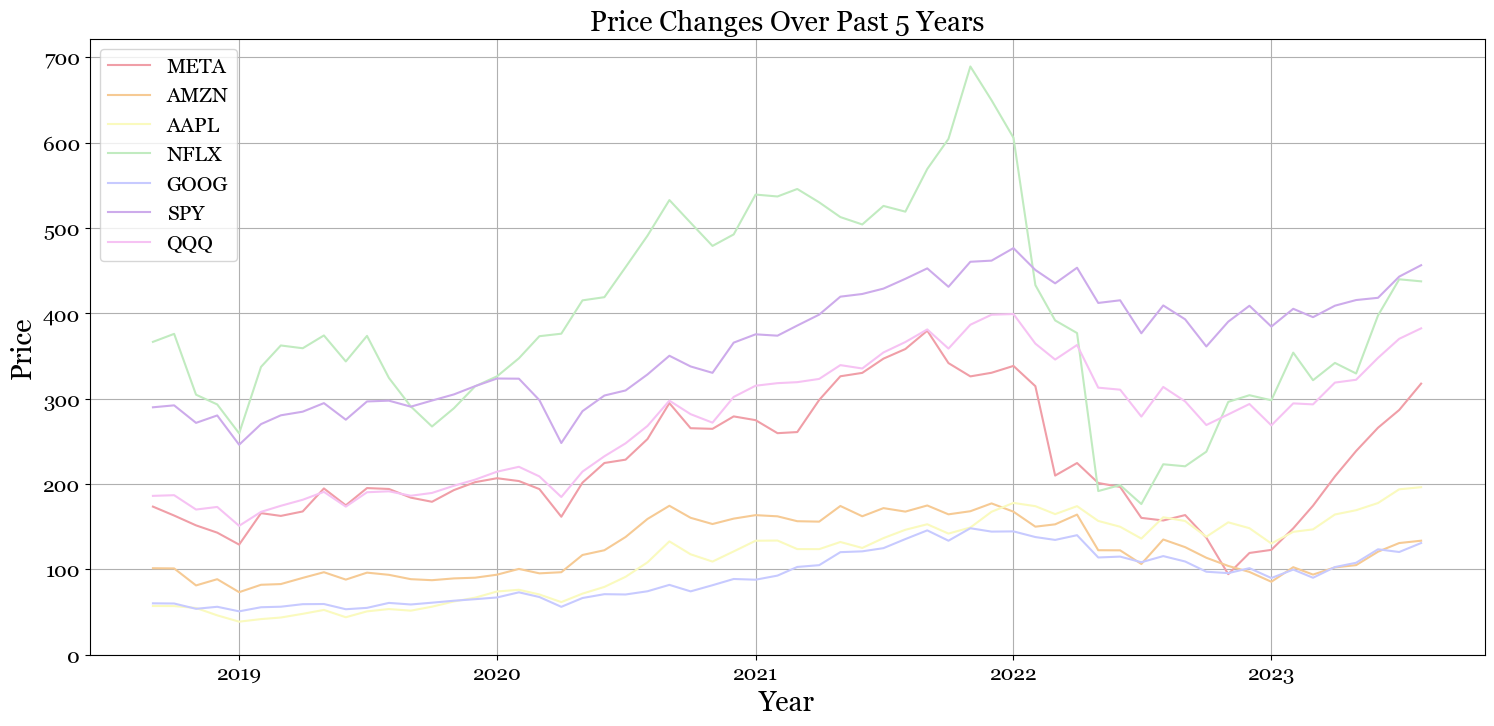

In [24]:
plt.figure(figsize = (18, 8))
plt.plot(meta['Date'], meta['Open'], color='#F09EA7', label = 'META')
plt.plot(amzn['Date'], amzn['Open'], color='#F6CA94', label = 'AMZN')
plt.plot(aapl['Date'], aapl['Open'], color='#FAFABE', label = 'AAPL')
plt.plot(nflx['Date'], nflx['Open'], color='#C1EBC0', label = 'NFLX')
plt.plot(goog['Date'], goog['Open'], color='#C7CAFF', label = 'GOOG')
plt.plot(spy['Date'], spy['Open'], color='#CDABEB', label = 'SPY')
plt.plot(qqq['Date'], qqq['Open'], color='#F6C2F3', label = 'QQQ')


plt.title("Price Changes Over Past 5 Years", **{'fontname':'Georgia', 'size':'20'})
plt.xlabel("Year", **{'fontname':'Georgia', 'size':'20'})
plt.ylabel("Price", **{'fontname':'Georgia', 'size':'20'})
plt.legend(title = '', loc = 'upper left', prop = {'family':'Georgia', 'size':'15'})
plt.ylim(0)

plt.xticks(**{'fontname':'Georgia'}, fontsize = '15')
plt.yticks(**{'fontname':'Georgia'}, fontsize = '15')

plt.grid()

plt.show()

### Price Analysis

#### Netflix stock has had the sharpest change in stock price, with a drastic dip in the middle of 2022. All other stocks have either stayed consistent in price, or have steadily increased at a slow pace.

### Volume Changes

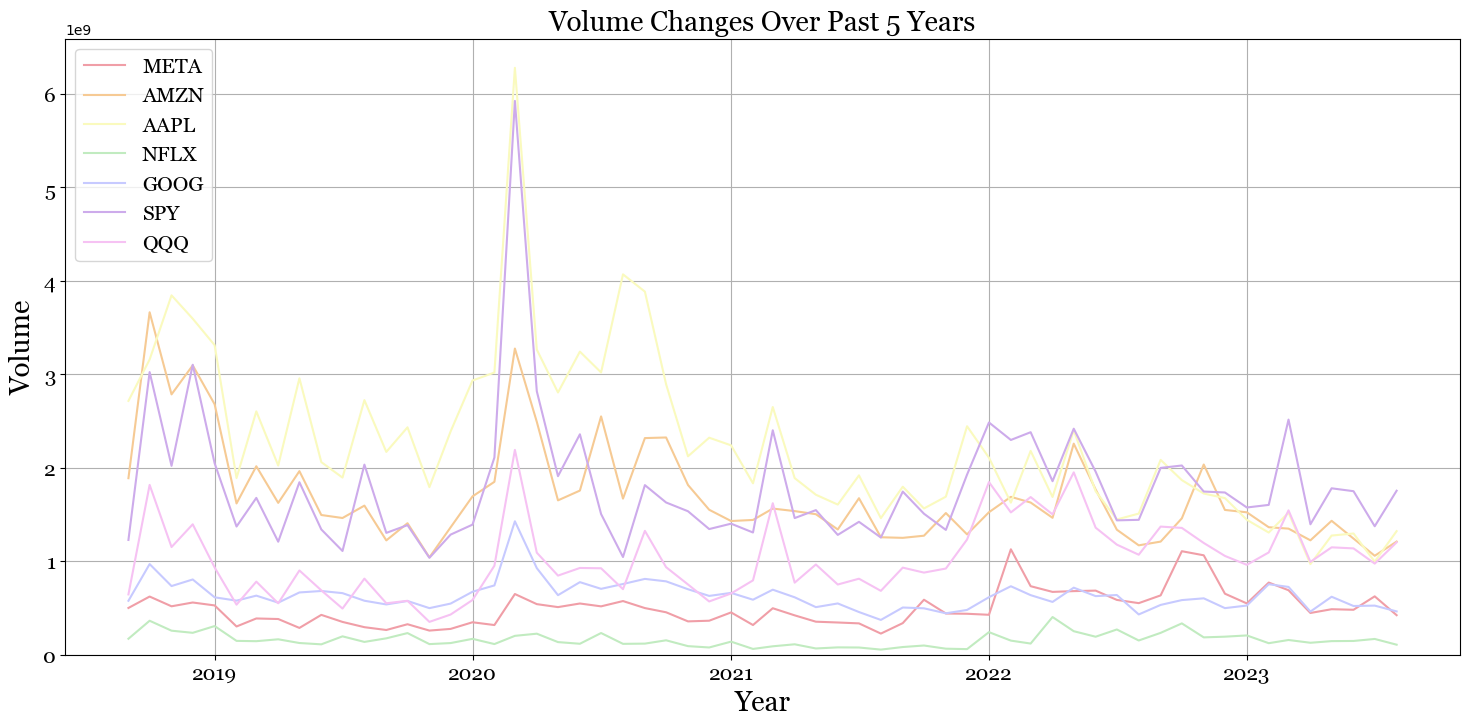

In [25]:
plt.figure(figsize = (18, 8))
plt.plot(meta['Date'], meta['Volume'], color='#F09EA7', label = 'META')
plt.plot(amzn['Date'], amzn['Volume'], color='#F6CA94', label = 'AMZN')
plt.plot(aapl['Date'], aapl['Volume'], color='#FAFABE', label = 'AAPL')
plt.plot(nflx['Date'], nflx['Volume'], color='#C1EBC0', label = 'NFLX')
plt.plot(goog['Date'], goog['Volume'], color='#C7CAFF', label = 'GOOG')
plt.plot(spy['Date'], spy['Volume'], color='#CDABEB', label = 'SPY')
plt.plot(qqq['Date'], qqq['Volume'], color='#F6C2F3', label = 'QQQ')


plt.title("Volume Changes Over Past 5 Years", **{'fontname':'Georgia', 'size':'20'})
plt.xlabel("Year", **{'fontname':'Georgia', 'size':'20'})
plt.ylabel("Volume", **{'fontname':'Georgia', 'size':'20'})
plt.legend(title = '', loc = 'upper left', prop = {'family':'Georgia', 'size':'15'})
plt.ylim(0)

plt.xticks(**{'fontname':'Georgia'}, fontsize = '15')
plt.yticks(**{'fontname':'Georgia'}, fontsize = '15')

plt.grid()

plt.show()

### Volume Analysis

#### The volume trading for these stocks have fluctuated around the same margin, except for netflix stock, consistently remaining as the lowest volume of stock traded. 

### Cumulative Monthly Returns

In [26]:
# determine the percent change between each month
monthly_return = adj_close.sort_index(ascending = True)
monthly_return[['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq']] = monthly_return[['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq']].pct_change()

# determine the percent change cumulatively
cum_monthlyret = (1 + monthly_return).cumprod() - 1; cum_monthlyret

,meta,amzn,aapl,nflx,goog,spy,qqq
Date,,,,,,,
2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,-0.077040,-0.202197,-0.030527,-0.193382,-0.097704,-0.064904,-0.084286
2018-11-01,-0.145020,-0.156166,-0.208881,-0.235212,-0.082956,-0.047551,-0.086738
...,...,...,...,...,...,...,...
2023-06-01,0.744984,0.301648,2.583904,0.177372,1.027317,0.652982,1.053515
2023-07-01,0.937249,0.334798,2.629787,0.173309,1.230769,0.713416,1.135738
2023-08-01,0.799161,0.378033,2.471230,0.159169,1.301827,0.685584,1.104019


#### Entire 5 Year Returns

In [27]:
yr_returns = cum_monthlyret.iloc[:, 0:].tail(1).reset_index(drop=True) * 100; yr_returns.round(2).applymap(lambda x: '{:.2%}'.format(x / 100))

,meta,amzn,aapl,nflx,goog,spy,qqq
0,79.92%,37.80%,247.12%,15.92%,130.18%,68.56%,110.40%


#### Visualize Cumulative Monthly Returns

In [28]:
# organize cumulative returns data together
cum_data = pd.melt(cum_monthlyret.reset_index(), id_vars = 'Date', var_name = 'Stock', value_name = 'Cumulative Monthly Return')
cum_data['Cumulative Monthly Return'] = cum_data['Cumulative Monthly Return'] * 100

# create figure
cum_fig = px.line(cum_data, x = 'Date',
              y = 'Cumulative Monthly Return', color = 'Stock',
              title = 'Performance - Cumulative Monthly Returns',
              labels = {'Date' : 'Cumulative Monthly Returns (%)'},
              color_discrete_sequence = ['#F09EA7', '#F6CA94', '#FAFABE', '#C1EBC0', '#C7CAFF', '#CDABEB', '#F6C2F3'])

cum_fig.update_layout({
    'font_family': 'Georgia',
    'font_color': 'black',
    'plot_bgcolor': 'white'
})

cum_fig.update_xaxes(
    mirror = True,
    ticks = 'outside',
    showline = True,
    linecolor = '#D3D3D3',
    gridcolor = '#D3D3D3'
)

cum_fig.update_yaxes(
    mirror = True,
    ticks = 'outside',
    showline = True,
    linecolor = '#D3D3D3',
    gridcolor = '#D3D3D3'
)

cum_fig.show()

### Cumulative Returns Analysis

#### Apple had the largest cumulative monthly returns, starting July 2020, where it started progressing faster than the other 6 stocks in terms of return. All other stocks stayed within the same margins of return, with the stocks ranking from first to last: Google, QQQ, Facebook, SPY, Amazon, and Netflix.

# Investment Strategy

### Using 60,000 dollars as a scenario to determine if all-in investment or spread-out investment is a better strategy. 

### All-In Investment

#### Investing 60,000 dollars on 9/1/2018, and determining the return on investment 5 years later, on 8/1/2023. 

In [29]:
# gather relevant data to calculate returns
AII_return = pd.DataFrame(columns = ['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq'])
AII_return.loc[0] = adj_close.iloc[59]
AII_return.loc[1] = (60000 / AII_return.iloc[0]).apply(np.floor)
AII_return.loc[2] = AII_return.iloc[1] * AII_return.iloc[0]
AII_return.loc[3] = AII_return.iloc[1] * adj_close.iloc[0]
AII_return.loc[4] = (((AII_return.iloc[3] - AII_return.iloc[2]) / AII_return.iloc[2]) * 100).round(2)

AII_return.insert(0, 'description', ['adjacent close prices on 9/1/2018', 'how many stocks $60,000 can buy', '$ spent', '$ sold', '% return'])

AII_return = AII_return.set_index('description'); AII_return

,meta,amzn,aapl,nflx,goog,spy,qqq
description,,,,,,,
adjacent close prices on 9/1/2018,164.46,100.15,54.05,374.13,59.67,266.24,179.39
"how many stocks $60,000 can buy",364.00,599.00,1110.00,160.00,1005.00,225.00,334.00
$ spent,59863.44,59989.85,59995.50,59860.80,59968.35,59904.00,59916.26
$ sold,107703.96,82667.99,208258.20,69388.80,138036.75,100973.25,126064.96
% return,79.92,37.80,247.12,15.92,130.18,68.56,110.40


## Spread-Out Investment (Dollar-Cost-Averaging)

In [30]:
def SOI(limit, money):
    
    SOI_stock = pd.DataFrame(columns = ['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq'])

    month = 1
    # iterating through months of 9/1/2018 to 8/1/2019
    for index, row in adj_close.sort_index(ascending = True).iterrows():
        if month < (limit + 1):
            first_row = []
            first_row.append((money / row).apply(np.floor))
            first_row = pd.DataFrame(first_row)
            SOI_stock = pd.concat([SOI_stock, first_row], ignore_index = True)
        month += 1
        
    SOI_stock.loc['Total'] = SOI_stock.sum()
        
    
    if limit != 60:
        yr = adj_close.sort_index(ascending = True).drop(adj_close.index[:(60 - limit)]).reset_index(drop=True)
    else:
        yr = adj_close.sort_index(ascending = True).reset_index(drop=True)

    # finding the money spent on amount of stocks bought
    SOI_value = yr.multiply(SOI_stock)

    SOI_value.loc['Total'] = SOI_value.sum()
    
    
    
    SOI_returns = pd.DataFrame(columns = ['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq'])

    # calculating returns
    SOI_sold = SOI_stock.loc['Total'] * adj_close.iloc[0]
    SOI_returns.loc[0] = ((SOI_sold - SOI_value.loc['Total']) / SOI_value.loc['Total']) * 100

    return SOI_returns

#### Scenario A: Investing 6,000 dollars every month for a year on the first day of the month, starting 9/1/2018, and determining the return on investment 5 years later, on 8/1/2023.

In [31]:
SOI(12, 6000)

,meta,amzn,aapl,nflx,goog,spy,qqq
0,77.808877,57.447877,310.559798,32.21304,143.183055,73.142468,120.15574


#### Scenario B: Investing 1,000 dollars every month for 3 years on the first day of the month, starting 9/1/2018, and determining the return on investment percentage 5 years later, on 8/1/2023.

In [32]:
SOI(36, 1000)

,meta,amzn,aapl,nflx,goog,spy,qqq
0,41.858287,24.05058,174.973507,14.603861,94.54844,50.331488,73.095738


#### Scenario C: Investing 1,000 dollars every month for a year on the first day of the month, starting 9/1/2018, and determining the return on investment 5 years later, on 8/1/2023.

In [33]:
SOI(60, 1000)

,meta,amzn,aapl,nflx,goog,spy,qqq
0,46.849542,19.48392,113.715758,25.178857,64.425475,33.910215,51.958459


# Conclusion

In [34]:
conc = pd.DataFrame(columns = ['meta', 'amzn', 'aapl', 'nflx', 'goog', 'spy', 'qqq'])
conc = pd.concat([conc, AII_return.tail(1).reset_index(drop=True), SOI(12, 5000).round(2), SOI(36, 1000).round(2), SOI(60, 1000).round(2)], ignore_index = True)
conc.insert(0, 'Strategy', ['All-In Investment Returns: 60K Invested 5 Years Ago', 'Spread-Out Investment: 5K/mo for 1st Year', 'Spread-Out Investment: Spread 1K over 3 Years', 'Spread-Out Investment: Spread 1K over 5 Years'])
conc = conc.set_index('Strategy')
conc = conc.applymap(lambda x: '{:.2%}'.format(x / 100)); conc

,meta,amzn,aapl,nflx,goog,spy,qqq
Strategy,,,,,,,
All-In Investment Returns: 60K Invested 5 Years Ago,79.92%,37.80%,247.12%,15.92%,130.18%,68.56%,110.40%
Spread-Out Investment: 5K/mo for 1st Year,77.99%,57.47%,310.56%,32.32%,143.17%,73.03%,120.17%
Spread-Out Investment: Spread 1K over 3 Years,41.86%,24.05%,174.97%,14.60%,94.55%,50.33%,73.10%
Spread-Out Investment: Spread 1K over 5 Years,46.85%,19.48%,113.72%,25.18%,64.43%,33.91%,51.96%


#### All-In Investment:
#### If you choose to invest in a single company, you can get a very good return, such as Apple and Google, which beat the index ETFs. However, you can also risk having a worse return, such as Amazon and Netflix. Knowing that FAANG stocks are popular and stable, buying unpopular stocks can result in even poorer results, so it's safer to buy index stocks, like SPY and QQQ. 

#### Spread-Out Investment:
#### If you rank the return rate amongst stocks themselves, the FAANG, SPY, and QQQ stock returns rank similarly to All-In Investment. The same advice can be offered here: it's easier to invest in index stocks in order to produce the safest and best returns.
#### However, to take note of the return percentages decreasing as the time frame for trading increased (excluding Facebook as an outlier), it's important that when choosing Spread-Out Investment, there should be a period of buying, and a longer period of holding the stock. This is most important to maximize returns.

### Comparison

#### It is clear that even though the stocks rank in the same order, Spread-Out Investment has comparitively better returns. That being said, choosing the dollar-cost averaging strategy produces the best results in terms of return on investment, regardless of amount of money invested, but only if the period of holding is long.